# Linear Regression
### Line of Best Fit vs. Closed Form Derivative vs. Gradient Descent 

The purpose of this notebook is to better my understanding of linear regression as a whole. I will be comparing three different methods of linear regression: line of best fit equations, closed form derivatives, and iterative otpimization. I would like to see if these methods all produce the same output, and if not, why?
### Table of Contents 
0. [Data](#data)
1. [Line of Best Fit](#lobf)
2. [Closed Form Derivative](#cfd)
3. [Gradient Descent](#gd)

### Findings
- Line of best fit formulas can be derived from the closed form optimization techniques, so results were the same
- Gradient descent using sum of squared errors as the loss function converged to the same values as both prior methods

### 0. Data <a id='data'></a>
From [HackerRank Challenge](https://www.hackerrank.com/challenges/correlation-and-regression-lines-7/problem) plotting physics scores against history scores.

In [43]:
import numpy as np 
import matplotlib.pyplot as plt

In [1]:
p_scores = [15,12,8,8,7,7,7,6,5,3]
h_scores = [10,25,17,11,13,17,20,13,9,15]

Text(0.5, 1.0, 'Physics vs. History Scores')

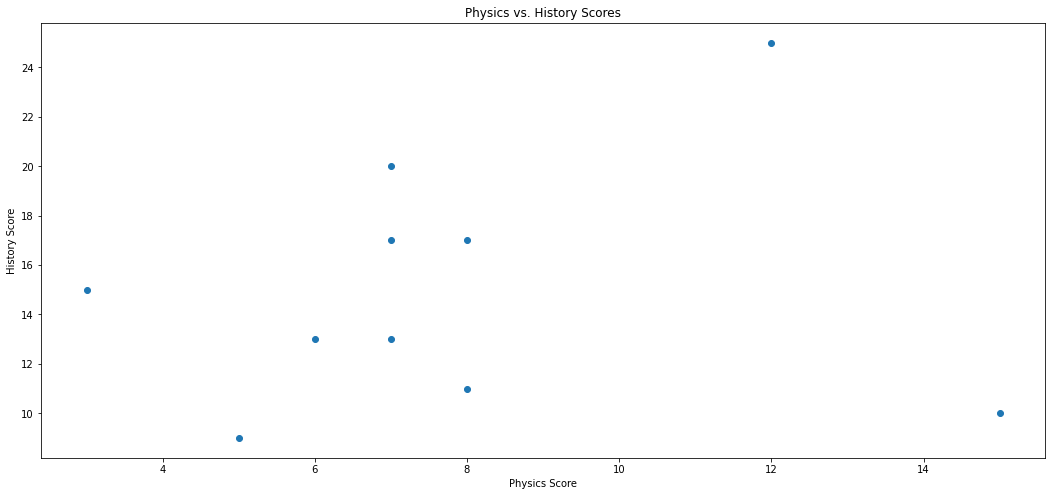

In [117]:
plt.figure(figsize=(18,8))
plt.scatter(p_scores, h_scores)
plt.xlabel('Physics Score')
plt.ylabel('History Score')
plt.title('Physics vs. History Scores')

### 1. Line of Best Fit <a id='lobf'></a>
Equations from [this](https://towardsdatascience.com/linear-regression-by-hand-ee7fe5a751bf) article. Honestly, not entirely sure why these are the equations for slope and intercept. <br>

**Questions**
- Do other methods converge to these parameters?

**Results**
$$m = ~0.2083$$
$$b = 13.375$$
$$SSE: 213.416$$

$$ y=mx+b$$
<br>
$$m = \frac{n(\Sigma xy)-(\Sigma x)(\Sigma y)}{n(\Sigma x^2)-(\Sigma x)^2}$$
<br>
$$b = \frac{\Sigma y - m(\Sigma x)}{n}$$

In [21]:
n = len(p_scores)
sum_x = sum(p_scores)
sum_y = sum(h_scores)
sum_xy = 0
for i in range(n):
    xy = p_scores[i]*h_scores[i]
    sum_xy += xy
sum_x2 = 0 
for i in p_scores:
    sum_x2 += i**2
sum_y2 = 0
for i in h_scores:
    sum_y2 += i**2

In [23]:
m = (n*sum_xy-sum_x*sum_y)/(n*sum_x2-(sum_x**2))
b = (sum_y-m*sum_x)/n
m,b

(0.20833333333333334, 13.375)

In [15]:
y_preds = []
for i in p_scores:
    app = i*m+b
    y_preds.append(app)

In [ ]:
sse = 0
for i in range(len(y_preds)):
    se = y_preds[i]-h_scores[i]
    sse += se**2

SSE: 213.41666666666663


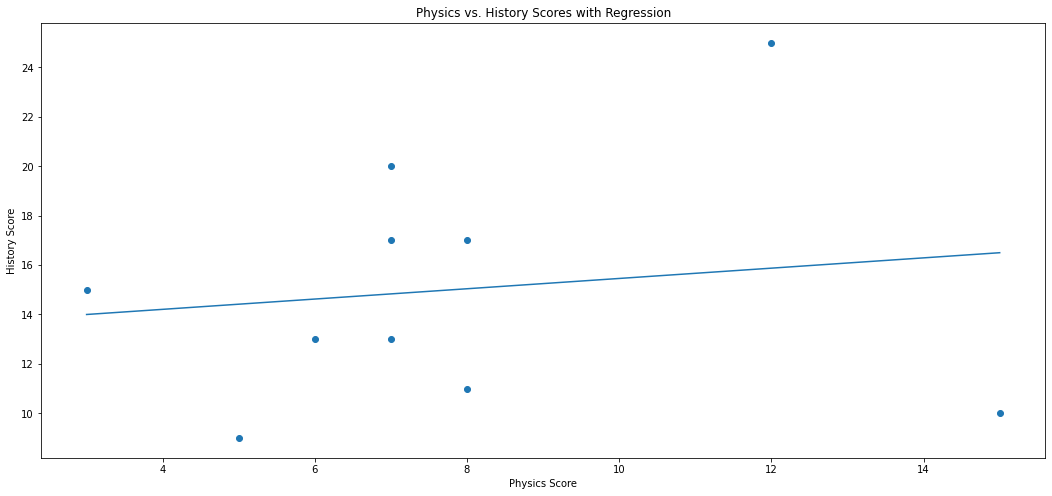

In [123]:
plt.figure(figsize=(18,8))
plt.scatter(p_scores, h_scores)
plt.plot(p_scores, y_preds)
plt.xlabel('Physics Score')
plt.ylabel('History Score')
plt.title('Physics vs. History Scores with Regression')
print('SSE: {}'.format(sse))

### 2. Closed Form Derivative <a id='cfd'></a>
https://www.cs.cmu.edu/~mgormley/courses/10701-f16/slides/lecture4.pdf

**Goal: to minimize sum of squared errors w.r.t slope**
<br>
To find: $$argmin_m \Sigma [y_i - (mx_i + b)]^2$$
<br>

Take the derivative w.r.t b and set to 0:
$$f=\Sigma[y_i - (mx_i + b]^2$$
$$\frac{\delta f}{\delta b} = 2\Sigma [y_i - (mx_i + b)]$$
$$2\Sigma y_i - 2\Sigma(mx_i + b) = 0 \Longrightarrow \Sigma y_i = \Sigma (mx_i +b)$$
$$\Sigma y_i = n*b +\Sigma mx_i$$
$$b = \frac{\Sigma y_i - \Sigma mx_i}{n}$$
<br>
$$b = \frac{\Sigma (y_i - mx_i)}{n}$$
<br>

Take the derivative w.r.t m and set to 0: 
$$f=\Sigma[y_i - (mx_i + b]^2$$
$$\frac{\delta f}{\delta m} = 2\Sigma (-x_i)[y_i - (mx_i + b)]$$
$$2\Sigma x_i[y_i - (mx_i +b)] = 0$$
$$\Sigma (x_i y_i) = \Sigma mx_i^2 + \Sigma bx_i$$
<br>
$$m = \frac{\Sigma (x_i(y_i -b))}{\Sigma x_i^2}$$
<br>

**Findings**
- The formula for b is the same as the method above (Line of Best fit) without any manipulation
- The formula for m is the same as the method above by plugging in b with the below manipulations:
$$m = \frac{\Sigma (x_i(y_i -b))}{\Sigma (x_i^2)}$$
$$m = \frac{\Sigma(x_i y_i) - \Sigma(x_i b)}{\Sigma (x_i^2)}$$
$$m\Sigma (x_i^2) = \Sigma(x_i y_i) - \Sigma x_i[\frac{\Sigma (y_i -mx_i)}{n}]$$
$$nm\Sigma (x_i^2) = n\Sigma(x_i y_i) - \Sigma x_i *\Sigma(y_i - mx_i)$$
$$nm\Sigma (x_i^2) = n\Sigma(x_i y_i) - (\Sigma x_i *\Sigma y_i) + m(\Sigma x_i)^2$$
$$nm\Sigma(x_i^2) - m(\Sigma x_i)^2 = n\Sigma(x_i y_i) - (\Sigma x_i * \Sigma y_i)$$
$$m(n\Sigma(x_i^2) - (\Sigma x_i)^2) = n\Sigma(x_i y_i) - (\Sigma x_i * \Sigma y_i)$$
<br>
$$m = \frac{n\Sigma(x_i y_i) - (\Sigma x_i * \Sigma y_i)}{n\Sigma(x_i^2) - (\Sigma x_i)^2}$$

**Results** 
Since the closed form derivative simplifies to the equations in the first method, the results are the same.
$$m = ~0.2083$$
$$b = 13.375$$
$$SSE: 213.416$$

### 3. Gradient Descent <a id='gd'></a>
https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931

$$\epsilon = \Sigma (y_i - \bar y)^2$$
$$m_{n+1} = m_n - \alpha\frac{\delta \epsilon}{\delta m_n}$$
$$b_{n+1} = b_n - \alpha\frac{\delta \epsilon}{\delta b_n}$$

In [113]:
alpha = 0.001 ##learning rate
max_iters = 10000
n = len(p_scores)

m = 0
b = 0

In [114]:
for i in range(max_iters):
    y_predict = np.multiply(p_scores, m) + b
    d_m = -2*sum(np.multiply(p_scores, np.subtract(h_scores, y_predict)))
    d_b = -2*sum(np.subtract(h_scores, y_predict))
    
    m = m - alpha * d_m
    b = b - alpha * d_b

In [115]:
m,b

(0.2083333333336143, 13.374999999997433)

In [124]:
gd_preds = np.multiply(p_scores, m)+b

In [127]:
gd_sse = 0
for i in range(len(gd_preds)):
    se = gd_preds[i]-h_scores[i]
    gd_sse += se**2

SSE: 213.41666666666669


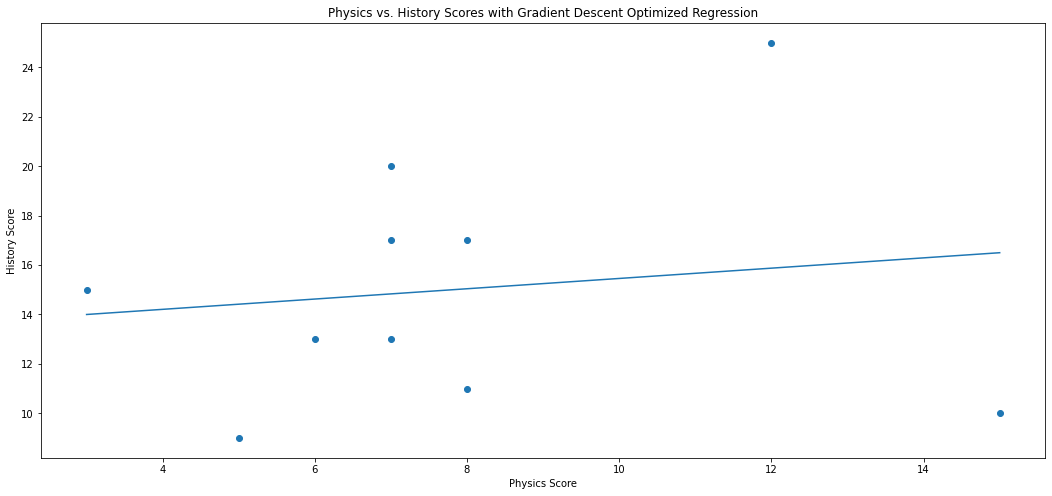

In [128]:
plt.figure(figsize=(18,8))
plt.scatter(p_scores, h_scores)
plt.plot(p_scores, gd_preds)
plt.xlabel('Physics Score')
plt.ylabel('History Score')
plt.title('Physics vs. History Scores with Gradient Descent Optimized Regression')
print('SSE: {}'.format(gd_sse))

**Findings** 
- The gradient descent optimization converged to the same values as the closed form derivative optimization: 

**Results** 
$$m = ~0.2083$$
$$b = 13.375$$
$$SSE: 213.416$$